$  % These are commands to simply writing vectors in bold. 
   \newcommand{\RR}{\mathbb{R}}
   \newcommand{\R}{\mathbb{R}}
   \newcommand{\B}[2][\varepsilon]{ B_{#1} \left( #2 \right) }
   \newcommand{\vec}[1]{ \boldsymbol{\mathbf{#1}} }
   \newcommand{\Z}{\mathbb{Z}}
   \newcommand{\C}{\mathbb{C}}
   \newcommand{\tr}[1]{\mathrm{tr}\left( #1 \right)}
   \newcommand{\ran}{\mathrm{ran}}
   \newcommand{\MC}[1]{\mathcal{M}_{#1}\left(\mathbb{C}\right)}
   \newcommand{\MR}[1]{\mathcal{M}_{#1}\left(\mathbb{R}\right)}
   \newcommand{\bkt}[1]{\left\langle #1 \right\rangle}
   \newcommand{\brc}[1]{\left\lbrace #1 \right\rbrace}
   \newcommand{\set}[2]{\left\lbrace #1 \middle\vert #2 \right\rbrace}
   \newcommand{\sfrac}[2]{\mathstrut^{#1}/_{#2}}
   \newcommand{\ra}{\rightarrow}
   \newcommand{\hip}[2]{\left\langle {#1},{#2} \right\rangle}
   \newcommand{\norm}[1]{\left\Vert {#1} \right\Vert}
   \newcommand{\hnorm}[1]{\left\Vert {#1} \right\Vert_2}
   \DeclareMathOperator*{\argmax}{argmax} % thin space, limits underneath in displays
   \DeclareMathOperator*{\argmin}{argmin} % no space, limits underneath in displays
$    

<h2 align = 'center'> Fall 2023: Operations Research </h2>
<h3 align = 'center'>  Noah Borquaye</h3>
<h4 align = 'center'>   Function Optimization and Duality Analysis</h4>
<p>&nbsp;</p>







First, we load some packages and do some configuration:

In [13]:
%matplotlib inline 
from matplotlib import pyplot as plt
import numpy as np 
%precision 9

from pandas import DataFrame
import warnings
warnings.simplefilter('ignore')

%run -i SimplexTools.py

The following commands are now available

* __add_method__ = adds a method to an instance of any class
* __var__ = creates a variable for creating Tableaus
* __param__ = creates a parameter for creating Tableaus
* __Vars__ = creates var objects from a list or string
* __Params__ = creates param objects from a list or structure
* __LinearExpression__ = class for expressions for linear programs
* __LinearRelation__ = class for equations and inequalities
* __GaussPivot__ = Gaussian Row Operations pivot for a pandas DataFrame
* __Tableau__ = Maps linear program as dictionary to DataFrame with GaussPivot

Also, the following helper methods are available:
* __BasicSolution__ = prints basic solution for a given tableau
* __OrderBasis__ = Arranges the simplex tableau into [I,M] form, where I is the identity matrix and M is what is left over
* __Simplex__ = Create simplex Tableau for a linear program, adding slack or surplus variables if necessary.  The solve method only implements maximization. 

NOTE: __GaussPivot__ can be applied directly to any DataFrame



\
__Problem:__ Find the __argmax__ $x_*$ of the function

$$f\left( x\right) =\min \left( 3x+21,x+14,21-21x\right)$$

by solving the linear program 
$$\begin{array}{lrl}
maximize & \mu  &  \\ 
subject \; to & 3x+21 & \geq \mu  \\ 
& x+14 & \geq \mu  \\ 
& 21-21x & \geq \mu 
\end{array}
$$
Find and solve the dual program. Finally, sketch the graph of $f(x)$ on
the interval $\left[ -7,1\right] $ and use complementary slackness to explain
the relationship of the dual problem to the graph of $f(x)$.

### __Solution__


We rewrite the LP as

$$\begin{array}{ll}
maximize & z = \mu + 0x \\ 
subject \; to & \mu - 3x \leq 21 \\ 
& \mu - x \leq 14 \\ 
& \mu + 21x \leq 21  \\ 
\end{array}
$$


In standard form, the Primal is 

$$\begin{array}{ll}
maximize & z = \mu + 0x + 0s_1 + 0s_2 + 0s_3\\ 
subject \; to & \mu - 3x  \quad + s_1 &  = 21 \\ 
& \mu - x  \quad  \quad\quad  \quad + s_2  & = 14 \\ 
& \mu + 21x \quad \quad \quad \quad \quad + s_3 &= 21  \\ 
\end{array}
$$


Solving using __the simplex method__


In [28]:
Vars('u x s_1 s_2 s_3')
LP = dict( )
LP['z'] = -u
LP['Con1'] = u - 3*x + s_1 == 21
LP['Con2'] = u - x + s_2 == 14
LP['Con3'] = u + 21*x + s_3 == 21
LP

{'z': -u,
 'Con1':  u - 3*x + s_1 ==  21,
 'Con2':  u - x + s_2 ==  14,
 'Con3':  u + 21*x + s_3 ==  21}

In [29]:
Tb = Tableau(LP)
Tb

,u,x,s_1,s_2,s_3,b,z
Con1,1.0,-3.0,1.0,0.0,0.0,21.0,0.0
Con2,1.0,-1.0,0.0,1.0,0.0,14.0,0.0
Con3,1.0,21.0,0.0,0.0,1.0,21.0,0.0
Objective1,-1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:
OrderBasis(Tb)


,s_1,s_2,s_3,u,x,b,z
Con1,1.0,0.0,0.0,1.0,-3.0,21.0,0.0
Con2,0.0,1.0,0.0,1.0,-1.0,14.0,0.0
Con3,0.0,0.0,1.0,1.0,21.0,21.0,0.0
Objective1,0.0,0.0,0.0,-1.0,0.0,0.0,1.0


In [31]:
BasicSolution(Tb)

In [32]:
Tb[ ['u', 'b'] ]


,u,b
Con1,1.0,21.0
Con2,1.0,14.0
Con3,1.0,21.0
Objective1,-1.0,0.0


In [33]:
ratios = Tb.loc[ :, ['u', 'b'] ]
ratios['ratio'] = Tb.b/Tb.u
ratios

,u,b,ratio
Con1,1.0,21.0,21.0
Con2,1.0,14.0,14.0
Con3,1.0,21.0,21.0
Objective1,-1.0,0.0,-0.0


In [34]:
Tb.GaussPivot('Con2', 'u')
Tb

,u,x,s_1,s_2,s_3,b,z
Con1,0.0,-2.0,1.0,-1.0,0.0,7.0,0.0
Con2,1.0,-1.0,0.0,1.0,0.0,14.0,0.0
Con3,0.0,22.0,0.0,-1.0,1.0,7.0,0.0
Objective1,0.0,-1.0,0.0,1.0,0.0,14.0,1.0


In [35]:
Tb[ ['x', 'b'] ]

,x,b
Con1,-2.0,7.0
Con2,-1.0,14.0
Con3,22.0,7.0
Objective1,-1.0,14.0


In [36]:
ratios = Tb.loc[ :, ['x', 'b'] ]
ratios['ratio'] = Tb.b/Tb.x
ratios

,x,b,ratio
Con1,-2.0,7.0,-3.500000
Con2,-1.0,14.0,-14.000000
Con3,22.0,7.0,0.318182
Objective1,-1.0,14.0,-14.000000


In [37]:
Tb.GaussPivot('Con3', 'x')
Tb

,u,x,s_1,s_2,s_3,b,z
Con1,0.0,0.0,1.0,-1.090909,0.090909,7.636364,0.0
Con2,1.0,0.0,0.0,0.954545,0.045455,14.318182,0.0
Con3,0.0,1.0,0.0,-0.045455,0.045455,0.318182,0.0
Objective1,0.0,0.0,0.0,0.954545,0.045455,14.318182,1.0


In [38]:
OrderBasis(Tb)

,s_1,u,x,s_2,s_3,b,z
Con1,1.0,0.0,0.0,-1.090909,0.090909,7.636364,0.0
Con2,0.0,1.0,0.0,0.954545,0.045455,14.318182,0.0
Con3,0.0,0.0,1.0,-0.045455,0.045455,0.318182,0.0
Objective1,0.0,0.0,0.0,0.954545,0.045455,14.318182,1.0


In [39]:
BasicSolution(Tb)

__argmax__ $x_*$ of the function is $x_* = 0.318$



__Then Dual program is;__

$$\begin{array}{ll}
minimize & z = 21y_1 + 14y_2 + 21y_3\\ 
subject \; to & y_1 + y_2 + y_3 \geq 1 \\ 
& -3y_1 - y_2 + 21y_3 \geq 0 \\ 
& y_1 \geq 0, y_2 \geq 0, y_3 \geq 0 \\ 
\end{array}
$$


Solving using __glpk__ 

In [40]:
%%script glpsol -m /dev/stdin

# declare problem variables
set I := 1..3;
var y{I} >= 0 ; 

# declare the objective 
minimize z: 21*y[1] + 14*y[2] + 21*y[3];  

# subject to the constraints
s.t.    constraint1:  y[1] + y[2] + y[3] >= 1;
        constraint2:  -3*y[1] - y[2] + 21*y[3] >= 0;
        
# solve
solve;

# display results
display y,z;

end;

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 -m /dev/stdin
Reading model section from /dev/stdin...
19 lines were read
Generating z...
Generating constraint1...
Generating constraint2...
Model has been successfully generated
GLPK Simplex Optimizer, v4.65
3 rows, 3 columns, 9 non-zeros
Preprocessing...
2 rows, 3 columns, 6 non-zeros
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  2.100e+01  ratio =  2.100e+01
GM: min|aij| =  4.671e-01  max|aij| =  2.141e+00  ratio =  4.583e+00
EQ: min|aij| =  2.182e-01  max|aij| =  1.000e+00  ratio =  4.583e+00
Constructing initial basis...
Size of triangular part is 2
      0: obj =   0.000000000e+00 inf =   4.671e-01 (1)
      2: obj =   1.431818182e+01 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.1 Mb (118395 bytes)
Display statement at line 17
y[3].val = 0.0454545454545455
y[2].val = 0.954545454545455
y[1].val = 0
z.val = 14.3181818181818
Model has been successfully processe

In [15]:

%config InlineBackend.figure_format = 'svg'


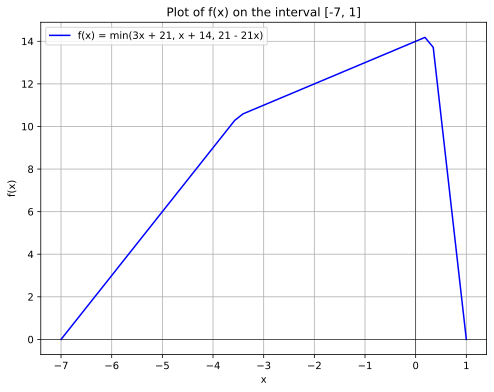

In [17]:
# Define the function f(x)
def f(x):
    return np.minimum(np.minimum(3*x + 21, x + 14), 21 - 21*x)

# Define the range of x values
x = np.linspace(-7, 1)

# Calculate the corresponding y values
y = f(x)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='f(x) = min(3x + 21, x + 14, 21 - 21x)', color='blue')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) on the interval [-7, 1]')
plt.grid(True)
plt.legend()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()


\
We observe that we have __strong duality__ since the dual program and primal program both yield an optimal objective value $z_* = 14.318.$
In addition, from the Dual program, $𝑦_1=0$ implies that the first constraint in the Primal is passive. Thus, the constraints $x+14 $ and $ 21−21x$ intersect to form the maximum.
